# Problem 1: EU Cities Temperatures Dataset (55 points)

Given a CSV data file as represented by the sample file EuCitiesTemperatures.csv (213 records), load it into a Pandas DataFrame and perform the following tasks on it.

In [9]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('EuCitiesTemperatures.csv')

# Display the DataFrame
df


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [10]:
# Calculate the average latitude and longitude for each country
df['latitude'] = df.groupby('country')['latitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))
df['longitude'] = df.groupby('country')['longitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))

# Print the updated DataFrame
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [17]:
# Filter the subset of cities
subset = df[df['latitude'].between(40, 60) & df['longitude'].between(15, 30)]

# Count the number of cities in each country
country_counts = subset['country'].value_counts()

# Find the countries with the maximum number of cities
max_countries = country_counts[country_counts == country_counts.max()]

# Print the countries with the maximum number of cities
max_countries


country
Romania    9
Poland     9
Name: count, dtype: int64

3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [12]:
# Calculate the average temperature for each region type
df['temperature'] = df.groupby(['EU', 'coastline'])['temperature'].transform(lambda x: x.fillna(x.mean()))

# Print the updated DataFrame
df


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000


1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

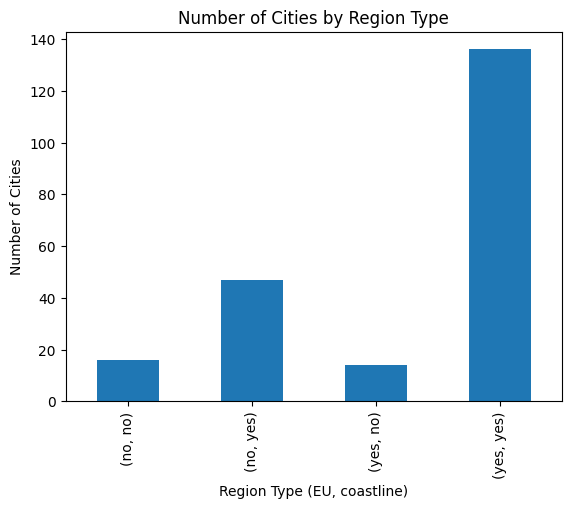

In [13]:
import matplotlib.pyplot as plt

# Count the number of cities in each region type
region_counts = df.groupby(['EU', 'coastline']).size()

# Plot the bar chart
region_counts.plot(kind='bar')

# Set the labels and title
plt.xlabel('Region Type (EU, coastline)')
plt.ylabel('Number of Cities')
plt.title('Number of Cities by Region Type')

# Show the plot
plt.show()


2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

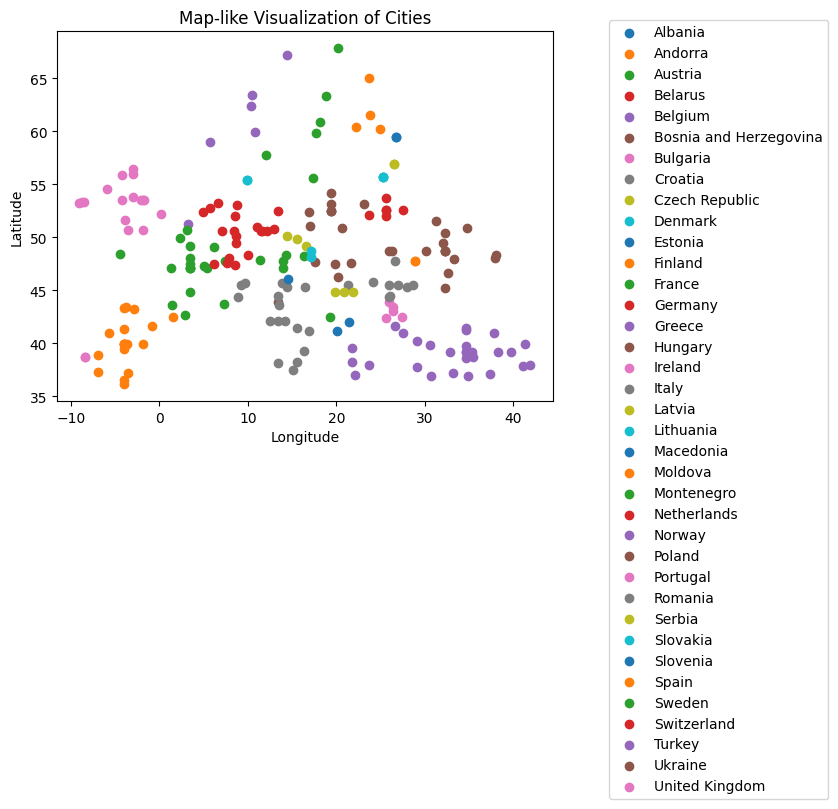

In [14]:
# Group the cities by country
grouped = df.groupby('country')

# Set up the scatter plot
fig, ax = plt.subplots()

# Iterate over each group (country)
for name, group in grouped:
    # Plot the latitude versus longitude values for each city in the group
    ax.scatter(group['longitude'], group['latitude'], label=name)

# Set the labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Map-like Visualization of Cities')

# Add a legend
ax.legend(bbox_to_anchor=(1.1, 1.05))

# Show the plot
plt.show()


3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

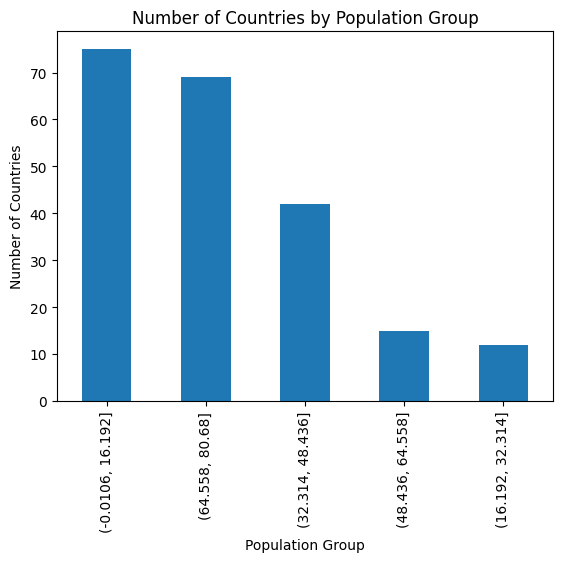

In [15]:
# Split the population values into 5 bins
df['population_group'] = pd.cut(df['population'], bins=5)

# Count the number of countries in each population group
country_counts = df['population_group'].value_counts()

# Plot the histogram
country_counts.plot(kind='bar')

# Set the labels and title
plt.xlabel('Population Group')
plt.ylabel('Number of Countries')
plt.title('Number of Countries by Population Group')

# Show the plot
plt.show()


4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

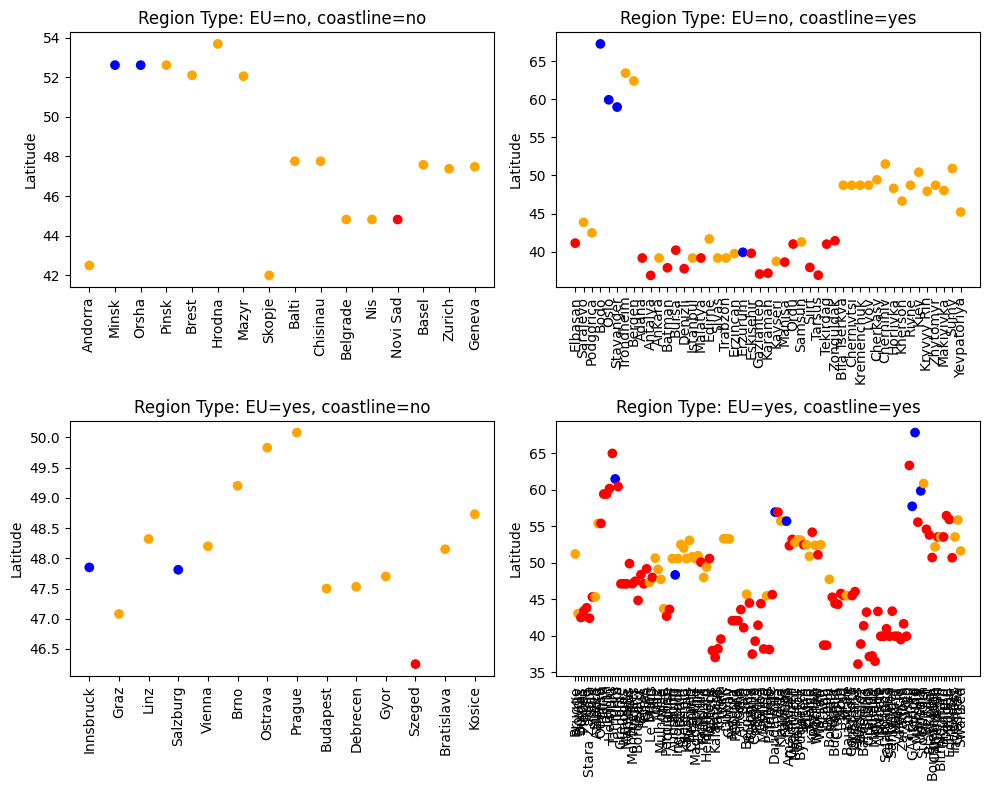

In [16]:
# Group the cities by region type
grouped = df.groupby(['EU', 'coastline'])

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over each region type
for (EU, coastline), ax in zip(grouped.groups.keys(), axes.flatten()):
    # Get the cities for the current region type
    cities = grouped.get_group((EU, coastline))
    
    # Set the x-axis ticks
    xticks = range(len(cities))
    ax.set_xticks(xticks)
    
    # Set the x-axis tick labels as city names
    ax.set_xticklabels(cities['city'], rotation=90)
    
    # Set the y-axis label
    ax.set_ylabel('Latitude')
    
    # Set the title
    ax.set_title(f'Region Type: EU={EU}, coastline={coastline}')
    
    # Plot the scatter plot
    scatter = ax.scatter(xticks, cities['latitude'], c=cities['temperature'].apply(lambda x: 'red' if x > 10 else 'blue' if x < 6 else 'orange'))
    
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
